# header codes to run (dependency methods)

In [235]:
cd /Users/zangsir/time-series-classification-and-clustering/

/Users/zangsir/time-series-classification-and-clustering


In [19]:
import pandas as pd
import numpy as np
import random
import matplotlib.pylab as plt
%matplotlib inline


In [20]:
def euclid_dist(t1,t2):
    return np.sqrt(sum((t1-t2)**2))

In [21]:
#objective Functions
#first with euclidean distance
def objectFunction(centroids,assignments):
    cum_all=0
    for cluster in range(len(assignments)):
        #print "cluster:",cluster
        cum_all=cum_all+cumDist(centroids[cluster],assignments[cluster])
    #print "total objective function value=",cum_all
    return cum_all
    
    
        
def cumDist(centroid,assignment):        
    cum_dist=0
    for i in assignment:
        cum_dist=cum_dist+euclid_dist(centroid,data[i])**2
    
    #print 'cum_dist_euclid=',cum_dist
    return cum_dist

In [22]:
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):
        
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return np.sqrt(LB_sum)

In [154]:
pwd

u'/Users/zangsir/time-series-classification-and-clustering/toneSub'

In [23]:
def DTWDistance(s1, s2,w):
    DTW={}
    
    w = max(w, abs(len(s1)-len(s2)))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
		
    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

In [240]:
#Data (demo)

train = np.genfromtxt('datasets/train.csv', delimiter='\t')
test = np.genfromtxt('datasets/test.csv', delimiter='\t')
#entire dataset
data=np.vstack((train[:,:-1],test[:,:-1]))

# Time Series Classification and Clustering with modification by zangsir

In a typical classification problem you are given a set of input features and a set of discrete output classes and you want to model the relationship between the two.  There is a myriad of classification algorithms that you could use for this problem - SVMs, Naive Bayes, k-NN, etc.  But what if the input features are not independent such as with time series data?  In this case SVMs and Naive Bayes would not be a good choice since they assume that the input features are independent.  The k-NN algorithm could still work however it relies on the notion of a similarity measure between input examples.  Now the question becomes _how do we measure the similarity between two time series_?

## How about Euclidean distance?

The Euclidean distance between two time series $Q$ and $C$ of length $n$ is defined as

$$d(Q,C) = \sqrt{\sum^n_{i=1}[Q(i)-C(i)]^2}$$

At first glance, it seems like simply calculating the Euclidean distance between two time series would give us a good idea of the similarity between them.  After all, the Euclidean distance between identical time series is zero and the Euclidean distance between very different time series is large.  However, before we settle on Euclidean distance as a similarity measure we should clearly state our desired criteria for determining the similarity between two time series 

With a good similarity measure, small changes in two time series should result in small changes in their similarity.  With respect to Euclidean distance this is true for changes in the y-axis, but it is not true for changes in the time axis (i.e. compression and stretching).  Consider the following example.

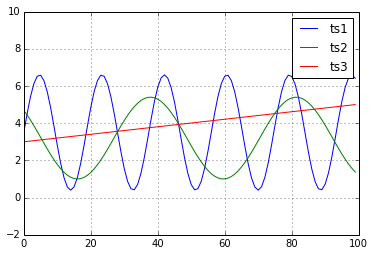

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

x=np.linspace(0,50,100)
ts1=pd.Series(3.1*np.sin(x/1.5)+3.5)
ts2=pd.Series(2.2*np.sin(x/3.5+2.4)+3.2)
ts3=pd.Series(0.04*x+3.0)

ts1.plot()
ts2.plot()
ts3.plot()

plt.ylim(-2,10)
plt.legend(['ts1','ts2','ts3'])
plt.show()

In the above example, it is clear that $ts1$ and $ts2$ are most similar (they are both $sin$ functions under different transformations).  $ts3$ is clearly the most different. Let's compute the Euclidean distance $d(ts1,ts2)$ and $d(ts1,ts3)$ to see if the Euclidean distance measure agrees with what our intuition tells us.  Let's first create a function that computes the Euclidean distance between two time series.

In [3]:
def euclid_dist(t1,t2):
    return np.sqrt(sum((t1-t2)**2))

In [4]:
type(ts1)

pandas.core.series.Series

In [5]:
a=np.array(range(1,200,3))
b=np.array(range(1,400,6))

In [6]:
len(a)

67

In [7]:
euclid_dist(a,b)

939.24916821895567

In [8]:
b

array([  1,   7,  13,  19,  25,  31,  37,  43,  49,  55,  61,  67,  73,
        79,  85,  91,  97, 103, 109, 115, 121, 127, 133, 139, 145, 151,
       157, 163, 169, 175, 181, 187, 193, 199, 205, 211, 217, 223, 229,
       235, 241, 247, 253, 259, 265, 271, 277, 283, 289, 295, 301, 307,
       313, 319, 325, 331, 337, 343, 349, 355, 361, 367, 373, 379, 385,
       391, 397])

In [9]:
type(a)

numpy.ndarray

In [10]:
print b

[  1   7  13  19  25  31  37  43  49  55  61  67  73  79  85  91  97 103
 109 115 121 127 133 139 145 151 157 163 169 175 181 187 193 199 205 211
 217 223 229 235 241 247 253 259 265 271 277 283 289 295 301 307 313 319
 325 331 337 343 349 355 361 367 373 379 385 391 397]


In [11]:
a

array([  1,   4,   7,  10,  13,  16,  19,  22,  25,  28,  31,  34,  37,
        40,  43,  46,  49,  52,  55,  58,  61,  64,  67,  70,  73,  76,
        79,  82,  85,  88,  91,  94,  97, 100, 103, 106, 109, 112, 115,
       118, 121, 124, 127, 130, 133, 136, 139, 142, 145, 148, 151, 154,
       157, 160, 163, 166, 169, 172, 175, 178, 181, 184, 187, 190, 193,
       196, 199])

In [12]:
len(a)


67

Let's now find the Euclidean distance between $ts1$ and $ts2$

In [13]:
print euclid_dist(ts1,ts2)

26.959216038


and the Euclidean distance between $ts1$ and $ts3$

In [14]:
print euclid_dist(ts1,ts3)

23.1892491903


This is not good because according to the Euclidean distance measure, $ts1$ is more similar to $ts3$ than to $ts2$ which contradicts our intuition.  This is the problem with using the Euclidean distance measure.  It often produced pessimistic similarity measures when it encounters distortion in the time axis.  The way to deal with this is to use dynamic time warping.

## Dynamic Time Warping

Dynamic time warping finds the optimal non-linear alignment between two time series.  The Euclidean distances between alignments are then much less susceptable to pessimistic similarity measurements due to distortion in the time axis.  There is a price to pay for this, however, because dynamic time warping is quadratic in the length of the time series used.

Dynamic time warping works in the following way. Consider two time series $Q$ and $C$ of the same length $n$ where $$Q=q_1,q_2,...,q_n$$ and $$C=c_1,c_2,...,c_n$$ The first thing we do is construct an $n\times n$ matrix whose $i,j^{th}$ element is the Euclidean distance between $q_i$ and $c_j$.  We want to find a path through this matrix that minimizes the cumulative distance.  This path then determines the optimal alignment between the two time series.  It should be noted that it is possible for one point in a time series to be mapped to multiple points in the other time series.

Let's call the path $W$ where $$W=w_1,w_2,...,w_K$$ where each element of $W$ represents the distance between a point $i$ in $Q$ and a point $j$ in $C$ i.e. $w_k=(q_i-c_j)^2$

So we want to find the path with the minimum Euclidean distance $$W^*=argmin_W(\sqrt{\sum_{k=1}^Kw_k})$$ The optimal path is found via dynamic programming, specifically the following recursive function. $$\gamma(i,j)=d(q_i,c_j)+min ( \gamma(i-1,j-1),\gamma(i-1,j),\gamma(i,j-1))$$ 

In [15]:
def DTWDistance(s1, s2):
    DTW={}
    
    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
		
    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

Now let's compute the Euclidean distance between $ts1$ and $ts2$ using dynamic time warping.

In [16]:
print DTWDistance(ts1,ts2)

17.9297184686


and now the dynamic time warping distance between $ts1$ and $ts3$

In [17]:
print DTWDistance(ts1,ts3)

21.5494948244


As you can see, our results have changed from when we only used the Euclidean distance measure.  Now, in agreement with our intuition, $ts2$ is shown to be more similar to $ts1$ than $ts3$ is.

### Speeding Up Dynamic Time Warping

#### 1. speed up by locality constraints

Dynamic time warping has a complexity of $O(nm)$ where $n$ is the length of the first time series and $m$ is the length of the second time series.  If you are performing dynamic time warping multiple times on long time series data, this can be prohibitively expensive.  However, there are a couple of ways to speed things up.  The first is to enforce a locality constraint.  This works under the assumption that it is unlikely for $q_i$ and $c_j$ to be matched if $i$ and $j$ are too far apart.  The threshold is determined by a window size $w$.  This way, only mappings within this window are considered which speeds up the inner loop. The following is the modified code which includes the window size $w$.

In [18]:
def DTWDistance(s1, s2,w):
    DTW={}
    
    w = max(w, abs(len(s1)-len(s2)))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
		
    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

Let's test this faster version.

In [19]:
print DTWDistance(ts1,ts2,10)

18.5965518384


In [20]:
print DTWDistance(ts1,ts3,10)

22.4724828468


#### 2. speed up by LB Keogh distance

Another way to speed things up is to use the _LB Keogh_ lower bound of dynamic time warping.  It is defined as $$LBKeogh(Q,C)=\sum_{i=1}^n (c_i-U_i)^2I(c_i > U_i)+(c_i-L_i)^2I(c_i < L_i)$$
where $U_i$ and $L_i$ are upper and lower bounds for time series $Q$ which are defined as $U_i=max(q_{i-r}:q_{i+r})$ and $L_i=min(q_{i-r}:q_{i+r})$ for a reach $r$ and $I(\cdot)$ is the indicator function. It can be implemented with the following function.

In [21]:
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):
        
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return np.sqrt(LB_sum)

Let's now test on $ts1$ and $ts2$

In [22]:
print LB_Keogh(ts1,ts2,20)

6.25389235159


and now $ts1$ and $ts3$.

In [23]:
print LB_Keogh(ts1,ts3,20)

19.9595478694


The _LB Keogh_ lower bound method is linear whereas dynamic time warping is quadratic in complexity which make it very advantageous for searching over large sets of time series. 

## Classification and Clustering

Now that we have a reliable method to determine the similarity between two time series, we can use the k-NN algorithm for classification.  Empirically, the best results have come when $k=1$.  The following is the 1-NN algorithm that uses dynamic time warping Euclidean distance.  In this algorithm, $train$ is the training set of time series examples where the class that the time series belongs to is appended to the end of the time series.  $test$ is the test set whose corresponding classes you are trying to predict.  In this algorithm, for every time series in the test set, a search must be performed through all points in the training set so that the most similar point is found.  Given that dynamic time warping is quadratic, this can be very computationally expensive.  We can speed up classification using the _LB Keogh_ lower bound.  Computing _LB Keogh_ is much less expensive than performing dynamic time warping.  And since $LB Keogh(Q,C) \leq DTW(Q,C)$ , we can eliminate time series that cannot possibly be more similar that the current most similar time series. In this way we are eliminating many unnecessary dynamic time warping computations.

In [24]:
from sklearn.metrics import classification_report

def knn(train,test,w):
    preds=[]
    for ind,i in enumerate(test):
        min_dist=float('inf')
        closest_seq=[]
        #print ind
        for j in train:
            if LB_Keogh(i[:-1],j[:-1],5)<min_dist:
                dist=DTWDistance(i[:-1],j[:-1],w)
                if dist<min_dist:
                    min_dist=dist
                    closest_seq=j
        preds.append(closest_seq[-1])
    return classification_report(test[:,-1],preds)

Now let's test it on some data. We will use a window size of 4.  Although the code is sped up with the use of the _LB Keogh_ bound and the dynamic time warping locality contraint, it may still take a few minutes to run.

In [25]:
train = np.genfromtxt('datasets/train.csv', delimiter='\t')
test = np.genfromtxt('datasets/test.csv', delimiter='\t')
#print knn(train,test,4)

<h2 style="background:blue;color:white;"> ZANGSIR EXPERIMENTS COMPMorPhon15 </h2>

### k-means clustering

#### k means clustering DTW with LB_Keogh lower bounding

In [15]:
#objective Functions
#first with euclidean distance
def objectFunction(centroids,assignments):
    cum_all=0
    #print "assignments:",len(assignments)
    #print "centroids",centroids
    for cluster in range(len(assignments)):
        #print "cluster:",cluster
        cum_all=cum_all+cumDist(centroids[cluster],assignments[cluster])
    #print "total objective function value=",cum_all
    return cum_all
    
    
        
def cumDist(centroid,assignment):        
    cum_dist=0
    for i in assignment:
        cum_dist=cum_dist+euclid_dist(centroid,data[i])**2
    
    #print 'cum_dist_euclid=',cum_dist
    return cum_dist

In [14]:
import random

def k_means_clust_DTW_LBK(data,num_clust,num_iter,w=5):
    centroids=random.sample(data,num_clust)
    counter=0
    old_centroids=None
    cost_log=[]
    for n in range(num_iter):
        
        counter+=1
        #print "iteration",counter
        
        
        if np.array_equal(old_centroids,centroids):
            return centroids, assignments,cost_log
        #else:
            #print "old!=new"
        assignments={}
        #assign data points to clusters
        for ind,i in enumerate(data):
            min_dist=float('inf')
            closest_clust=None
            #here the min_dist is the min_dist to centroid: which centroid is closest to this point?
            for c_ind,j in enumerate(centroids):
                #only if the LB_Keogh distance is smaller than the min_dist, then we compute the DTW distance
                if LB_Keogh(i,j,5)<min_dist:
                    cur_dist=DTWDistance(i,j,w)
                    if cur_dist<min_dist:
                        min_dist=cur_dist
                        closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]
                #print "not in:",ind
                
        old_centroids=centroids[:]
        cost=objectFunction(centroids,assignments)
        cost_log.append(cost)
        
        
        #recalculate centroids of clusters
        for key in assignments:
            clust_sum=0
            for k in assignments[key]:
                clust_sum=clust_sum+data[k]
            if not np.array_equal(clust_sum,0):
                centroids[key]=[m/len(assignments[key]) for m in clust_sum]
            else:
                centroids=random.sample(data,num_clust)
                break
        
    return centroids, assignments,cost_log
        

In [16]:
objectFunction(centroids,assignments)

NameError: name 'centroids' is not defined

iteration 1
old!=new
cluster: 0
cluster: 1
cluster: 2
cluster: 3
total objective function value= 50221.2276864
iteration 2
old!=new
cluster: 0
cluster: 1
cluster: 2
cluster: 3
total objective function value= 22262.1211048
iteration 3
old!=new
cluster: 0
cluster: 1
cluster: 2
cluster: 3
total objective function value= 19576.1427479
iteration 4
old!=new
cluster: 0
cluster: 1
cluster: 2
cluster: 3
total objective function value= 18846.1816913
iteration 5
old!=new
cluster: 0
cluster: 1
cluster: 2
cluster: 3
total objective function value= 18845.3840108
iteration 6


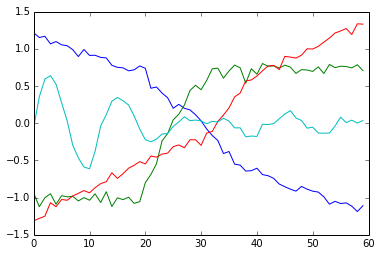

In [130]:
train = np.genfromtxt('datasets/train.csv', delimiter='\t')
test = np.genfromtxt('datasets/test.csv', delimiter='\t')
#entire dataset
data=np.vstack((train[:,:-1],test[:,:-1]))

import matplotlib.pylab as plt

centroids,assignments=k_means_clust_DTW_LBK(data,4,15,4)
for i in centroids:
    plt.plot(i)
plt.show()


#next: we need to run this many times to get the best objective function

In [107]:
print len(centroids)
print len(assignments)

4
4


In [105]:
#objective function sub-routine with euclidean or dtw distance
cum_dist=0
for i in assignments[0]:
    #print i,
    cum_dist=cum_dist+euclid_dist(centroids[0],data[i])
print 'cum_dist_euclid=',cum_dist


cum_dist=0
for i in assignments[0]:
    #print i,
    cum_dist=cum_dist+DTWDistance(centroids[0],data[i],4)
print 'cum_dist_dtw=',cum_dist

cum_dist_euclid= 1482.84880711
cum_dist_dtw= 1358.89682356


In [95]:
print assignments[0]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399]


In [35]:
len (data)

600

In [44]:
total=0
for i in assignments:
    print len(assignments[i])
    total=total+len(assignments[i])
print total

197
199
89
111
596


Let's test it on the entire data set (i.e. the training set and the test set stacked together).

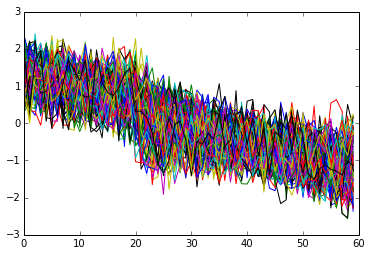

In [91]:
for j in assignments[1]:
    plt.plot(data[j])

In [33]:
len(assignments)

4

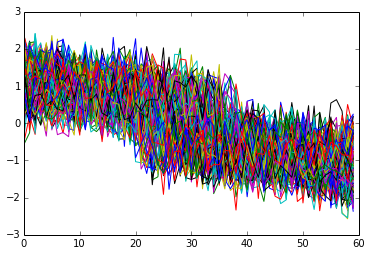

In [79]:
#plot all time series within a cluster assignment
for j in assignments[3]:
    plt.plot(data[j])
    


### Euclidean distance k means

In [13]:
#euclidean distance kmeans
def k_means_clust_euclid(data,num_clust,num_iter):
    centroids=random.sample(data,num_clust)
    #print "random init:",centroids
    counter=0
    old_cent=None
    cost_log=[]
    for n in range(num_iter):
        
        counter+=1
        #print "iteration",counter
        #print "old c",old_cent
        #print "new c",centroids
        #print "assignments-begin",assginments
        if np.array_equal(old_cent,centroids):
            return centroids, assignments,cost_log
        #else:
            #print "old!=new"
        old_cent=centroids[:]
        #print "copied old:",old_cent
        #assign data points to clusters
        assignments={}
        for ind,i in enumerate(data):
            #print "ass",assignments
            min_dist=float('inf')
            closest_clust=None
            #here the min_dist is the min_dist to centroid: which centroid is closest to this point?
            for c_ind,j in enumerate(centroids):                
                cur_dist=euclid_dist(i,j)
                if cur_dist<min_dist:
                    min_dist=cur_dist
                    closest_clust=c_ind
            if closest_clust in assignments:
                #print "closest cent:",closest_clust
                assignments[closest_clust].append(ind)
            else:
                #print "no in ass"
                assignments[closest_clust]=[]
                #print "not in:",ind
        # print "assignments", assignments       
        #print "old before new:",old_cent
        
        #print 'centroids',centroids
        cost=objectFunction(centroids,assignments)
        cost_log.append(cost)
        
        #recalculate centroids of clusters

        for key in assignments:
            clust_sum=0
            for k in assignments[key]:
                clust_sum=clust_sum+data[k]
                #print "clust sum:",clust_sum
            #print "----OLD-before",old_cent
            if not np.array_equal(clust_sum,0):
                #print 'clust sum=',clust_sum
                #centroids[key]=[m/len(assignments[key]) for m in clust_sum]
                centroids[key]=np.array(clust_sum)/len(assignments[key])
                #print "------clust sum !=0"
                #print "----OLD",old_cent
            else:
                centroids=random.sample(data,num_clust)
                #print "------clust sum = 0"
                break
        #print "computed new:",centroids
        #print "old at this point:",old_cent
        #print "============"
    return centroids, assignments, cost_log

In [152]:
len(data)

1920

iteration 1
old!=new
total objective function value= 31971.1761617
iteration 2
old!=new
total objective function value= 19921.9805711
iteration 3
old!=new
total objective function value= 18777.5425237
iteration 4
old!=new
total objective function value= 18530.6240451
iteration 5
old!=new
total objective function value= 18473.1966206
iteration 6
old!=new
total objective function value= 18467.4425023
iteration 7


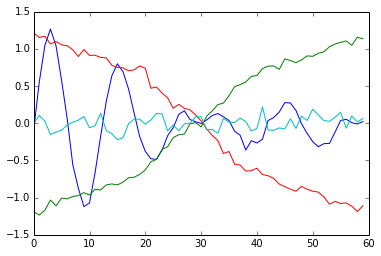

In [22]:
#shuodata = np.genfromtxt('datasets/shuodata.csv', delimiter=',')

centroids,assignments,cost=k_means_clust_mindist(data,4,10)
for i in centroids:
    plt.plot(i)
plt.show()

In [47]:
print assignments

{0: [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199], 1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}


In [51]:
shuodata[101][0]

61.63139305

In [146]:
len(data[0])

60

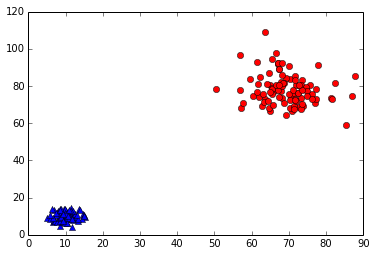

In [57]:
for j in assignments[0]:
    plt.plot(shuodata[j][0],shuodata[j][1],'ro')
    
for j in assignments[1]:
    plt.plot(shuodata[j][0],shuodata[j][1],'b^')

In [38]:
print centroids

[array([ 69.25976808,  78.36610084]), array([ 9.87913668,  9.99677956])]


In [34]:
assignments={0: [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199], 1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}

In [56]:
centroid=[np.array([ 71.53075165,  72.52572103]), np.array([ 64.99980706,  77.02456923])]
old_cent=centroid

### kmeans with mindist

In [74]:
pwd

u'/Users/zangsir/time-series-classification-and-clustering/toneSub'

In [75]:
cd ..

/Users/zangsir/time-series-classification-and-clustering


In [76]:
ls

README.md       clustering/     dendrogram.png  saxpy.py        toneData/
classification/ datasets/       image2.pdf      saxpy.pyc       toneSub/


In [77]:
from saxpy import SAX
def minDist(t1,t2,word,alpha,eps=0.000001):
    s=SAX(word,alpha,eps)
    (t1String, t1Indices) = s.to_letter_rep(t1)
    (t2String, t2Indices) = s.to_letter_rep(t2)
    return s.compare_strings(t1String,t2String)

In [33]:
minDist(data[0],data[280],5,6)
#I've tested the implementation of flat TS, should be fine

3.9659046887185774

### mindist kmeans new implementation (fast)

In [8]:
#mindist distance kmeans
def k_means_clust_mindist(data,num_clust,num_iter,word,alpha):
    
    data_SAX=[]
    s=SAX(word,alpha,0.000001)
    for ts in data:
        #convert i, a time series, into SAX
        (tsString, tsIndices) = s.to_letter_rep(ts)
        data_SAX.append(tsString)
    #print "Data", data_SAX
    
    
    centroids=random.sample(data,num_clust)
    centroids_SAX=[]
    for ts in centroids:
        #convert i, a time series, into SAX
        (tsString, tsIndices) = s.to_letter_rep(ts)
        centroids_SAX.append(tsString)
    #print "cent",centroids_SAX
    
    counter=0
    old_cent=None
    cost_log=[]
    for n in range(num_iter):
        
        counter+=1
        #print "iteration",counter

        if np.array_equal(old_cent,centroids):
            print "num of iteration:",n-1
            return centroids, assignments,cost_log
        #else:
            #print "old!=new"
        
        old_cent=centroids[:]
        #print 'old cent',old_cent
        #assign data points to clusters
        assignments={}
        for ind,i in enumerate(data_SAX):
            #print "ass",assignments
            min_dist=float('inf')
            closest_clust=None
            #here the min_dist is the min_dist to centroid: which centroid is closest to this point?
            for c_ind,j in enumerate(centroids_SAX):                
                cur_dist=s.compare_strings(i,j)
                if cur_dist<min_dist:
                    min_dist=cur_dist
                    closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]
        if len(assignments)==num_clust:
            cost=objectFunction(centroids,assignments)
        else:
            cost=float('inf')
        cost_log.append(cost)
        #recalculate centroids of clusters
        for key in assignments:
            clust_sum=0
            for k in assignments[key]:
                clust_sum=clust_sum+data[k]
            if not np.array_equal(clust_sum,0):
                centroids[key]=np.array(clust_sum)/len(assignments[key])
            else:
                centroids=random.sample(data,num_clust)
                break
        
        centroids_SAX=[]
        for ts in centroids:
            #convert i, a time series, into SAX
            (tsString, tsIndices) = s.to_letter_rep(ts)
            centroids_SAX.append(tsString)
        #print "cent",centroids_SAX
        #print "new cent",centroids
        #print "old cent end",old_cent
        #print "============"
    return centroids, assignments,cost_log

In [169]:
demodata

array([[-0.37693558,  1.2248643 ,  0.34387438, ...,  0.91834602,
        -1.3117417 , -1.1971462 ],
       [ 0.64440621,  0.41326914, -0.86227849, ...,  1.3981403 ,
         0.08574208,  0.02499741],
       [-0.97866735, -0.40623244,  0.82242857, ...,  0.66612895,
         0.10699555,  0.08271546],
       ..., 
       [ 0.8455511 ,  0.05714152,  1.2228095 , ..., -0.51199761,
        -0.86978484, -0.2057573 ],
       [ 1.9725294 ,  0.41645028,  1.6845052 , ..., -1.3956278 ,
        -1.0317821 , -1.1345864 ],
       [ 1.5162553 ,  1.1602023 ,  1.2666022 , ..., -0.85115838,
        -0.85573754, -1.0178208 ]])

## Original implmentation of Kmeans mindist (slow)

In [252]:
#mindist distance kmeans Original Implementation
def k_means_clust_mindist_slow(data,num_clust,num_iter,word,alpha):
    centroids=random.sample(data,num_clust)
    counter=0
    old_cent=None
    cost_log=[]
    for n in range(num_iter):
        
        counter+=1
        print "iteration",counter

        if np.array_equal(old_cent,centroids):
            return centroids, assignments,cost_log
        #else:
            #print "old!=new"
        old_cent=centroids[:]

        #assign data points to clusters
        assignments={}
        for ind,i in enumerate(data):
            #print "ass",assignments
            min_dist=float('inf')
            closest_clust=None
            #here the min_dist is the min_dist to centroid: which centroid is closest to this point?
            for c_ind,j in enumerate(centroids):                
                cur_dist=minDist(i,j,word,alpha)
                if cur_dist<min_dist:
                    min_dist=cur_dist
                    closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]

        cost=objectFunction(centroids,assignments)
        cost_log.append(cost)
        #recalculate centroids of clusters
        for key in assignments:
            clust_sum=0
            for k in assignments[key]:
                clust_sum=clust_sum+data[k]
            if not np.array_equal(clust_sum,0):
                centroids[key]=np.array(clust_sum)/len(assignments[key])
            else:
                centroids=random.sample(data,num_clust)
                break
        #print "============"
    return centroids, assignments,cost_log

------------------ 12 6
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4


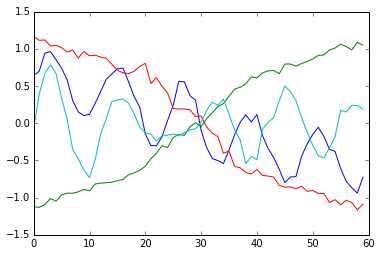

------------------ 12 7
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
num of iteration: 6


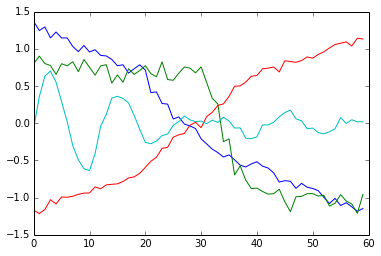

------------------ 12 8
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4


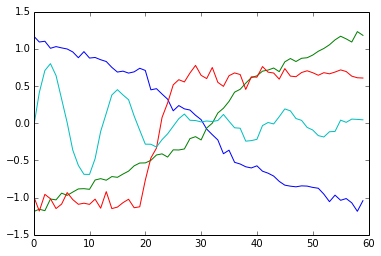

------------------ 12 9
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
num of iteration: 4


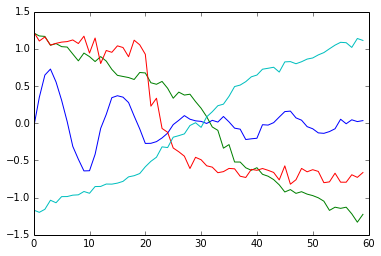

------------------ 12 10
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
num of iteration: 8


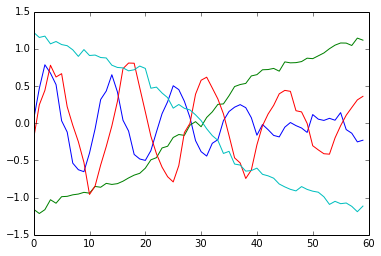

------------------ 12 11
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
num of iteration: 4


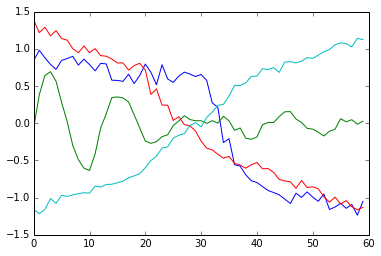

------------------ 13 6
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
num of iteration: 8


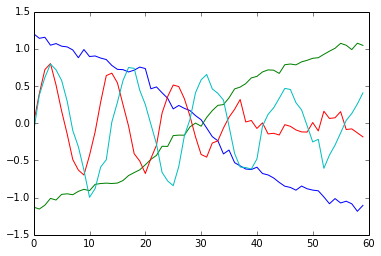

------------------ 13 7
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
num of iteration: 7


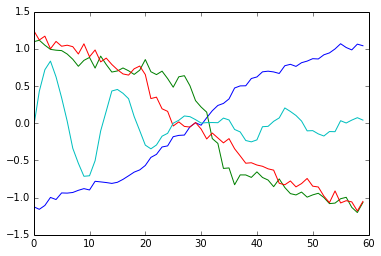

------------------ 13 8
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
num of iteration: 6


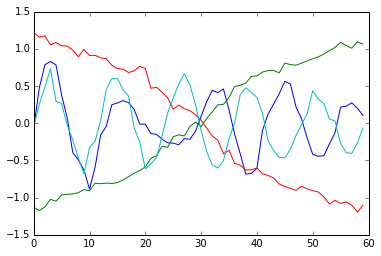

------------------ 13 9
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4


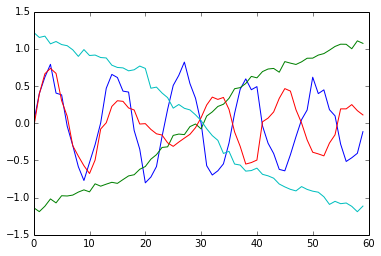

------------------ 13 10
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
num of iteration: 7


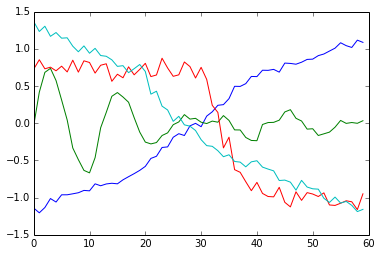

------------------ 13 11
assignments: 4
assignments: 4
assignments: 4
assignments: 4
assignments: 4
num of iteration: 4


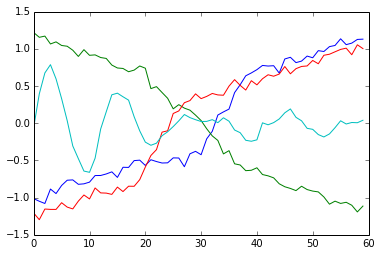

In [276]:
#experiment with pars of SAX. good:(5,7),(14,11),(14,6),(12,10)|(14,10),(13,6),(12,11)
for p in range(12,14):
    for q in range(6,12):
        print "------------------",p,q
        centroids,assignments,cost=k_means_clust_mindist(data,4,10,p,q)
        for i in centroids:
            plt.plot(i)
        plt.show()

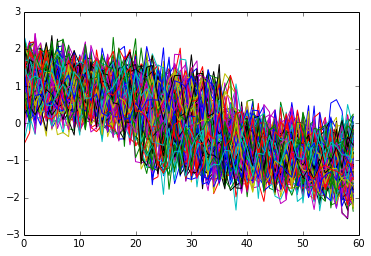

In [167]:
for j in assignments[3]:
    plt.plot(data[j])

In [158]:
demodata

array([[-0.37693558,  1.2248643 ,  0.34387438, ...,  0.91834602,
        -1.3117417 , -1.1971462 ],
       [ 0.64440621,  0.41326914, -0.86227849, ...,  1.3981403 ,
         0.08574208,  0.02499741],
       [-0.97866735, -0.40623244,  0.82242857, ...,  0.66612895,
         0.10699555,  0.08271546],
       ..., 
       [ 0.8455511 ,  0.05714152,  1.2228095 , ..., -0.51199761,
        -0.86978484, -0.2057573 ],
       [ 1.9725294 ,  0.41645028,  1.6845052 , ..., -1.3956278 ,
        -1.0317821 , -1.1345864 ],
       [ 1.5162553 ,  1.1602023 ,  1.2666022 , ..., -0.85115838,
        -0.85573754, -1.0178208 ]])

we have implemented k means related code above, including k means with euclidean dist, dtw dist with lower bounding, and with SAX MIN_Dist distance measure.

In [46]:
ls

README.md
Time Series Classification and Clustering.ipynb
classification/
clustering/
datasets/
dendrogram.png
saxpy.py
saxpy.pyc
toneData/


<h2 style="background-color:blue; color:white;"> APPLICATION TO TONES </h2>

## all numeric features with k means euclidean distance

In [2]:
cd /Users/zangsir/time-series-classification-and-clustering/toneData/

/Users/zangsir/time-series-classification-and-clustering/toneData


In [11]:

from os import listdir
from os.path import isfile, join
import numpy as np
mypath="/Users/zangsir/time-series-classification-and-clustering/toneData/"
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]

In [4]:

onlyfiles

['allxudn-3speakers-sorttone.csv',
 'concatSynth1-sorttone.csv',
 'poly-normed-bark-30p-sorttone.csv',
 'row-yixu-hertz-sorttone.csv',
 'row-yixunorm-bk-sorttone.csv']

/Users/zangsir/time-series-classification-and-clustering/toneData


In [5]:
#tone labels

tone_label=[]
for i in range(4):
    tone=[i+1]*480
    tone_label.extend(tone[:])
print len(tone_label)


1920


In [6]:
def computeAccuracy(assignments):
    tone_assign=[]
    total_correct=0
    record=[]
    for k in assignments:
        #print k
        tonex=[]
        a,b,c,d=0,0,0,0
        
        for idx in assignments[k]:
            #print idx,
            if idx<480:
                tonex.append(1)
                a+=1
            elif idx<960:
                tonex.append(2)
                b+=1
            elif idx<1440:
                tonex.append(3)
                c+=1
            else:
                tonex.append(4)
                d+=1
        tone_assign.append(tonex)
        l=[a,b,c,d]
        #majority is the tone label with the majority class in this cluster
        majority=l.index(max(l))+1
        
        if not majority in record:
            record.append(majority)
            num_majority=max(l)
            total_correct=total_correct+num_majority
        else:
            print "duplicated majority class, accuracy too low!!! Exiting..."
            break
    if len(record)==4:
        accuracy=total_correct/float(1920)
        #print "total correct:",total_correct
        #print "accureacy:",accuracy
        return accuracy
    else:
        #print "no accuracy to be computed"
        return 0    
    

In [17]:
computeAccuracy(assignments)

NameError: name 'assignments' is not defined

In [83]:
a,b,c,d=0,0,0,8

In [80]:
a+=1

In [86]:
l=[a,b,c,d]
l.index(max(l))+1

4

In [76]:
print len(tone_assign[2])
print len(assignments[2])
print tone_assign[0]

566
566
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3

+++++++++++++++++++++++++++++++++++
Feature FILE: allxudn-3speakers-sorttone.csv
run: 0
run: 1
run: 2
run: 3
run: 4
duplicated majority class, accuracy too low!!! Exiting...
run: 5
run: 6
run: 7
best accuracy: 0.8
Objective Functions: [860354112.43750882, 614059365.82261312, 563961190.6792233, 537528346.81002879, 533600990.87624633, 533214630.74947715, 533079816.41700232, 533018010.36308229, 532979891.13914049, 532948992.46797866]


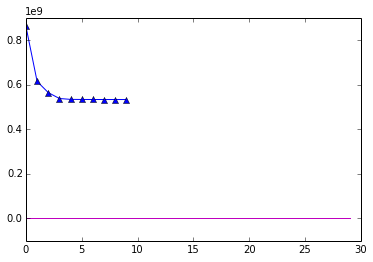

+++++++++++++++++++++++++++++++++++
Feature FILE: concatSynth1-sorttone.csv
run: 0
run: 1
run: 2
duplicated majority class, accuracy too low!!! Exiting...
run: 3
run: 4
duplicated majority class, accuracy too low!!! Exiting...
run: 5
run: 6
duplicated majority class, accuracy too low!!! Exiting...
run: 7
duplicated majority class, accuracy too low!!! Exiting...
best accuracy: 0.4953125
Objective Functions: [98082325534678.719, 2621382.979841115, 98083118060601.953, 4580540.3374473555, 98082325125210.0, 3264215.9957153397, 98082325311040.562, 2510011.241618963, 98083496542867.672, 2914528.621213302]


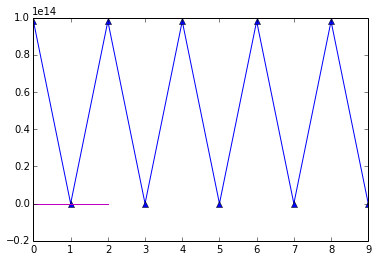

+++++++++++++++++++++++++++++++++++
Feature FILE: poly-normed-bark-30p-sorttone.csv
run: 0
duplicated majority class, accuracy too low!!! Exiting...
run: 1
duplicated majority class, accuracy too low!!! Exiting...
run: 2
duplicated majority class, accuracy too low!!! Exiting...
run: 3
duplicated majority class, accuracy too low!!! Exiting...
run: 4
duplicated majority class, accuracy too low!!! Exiting...
run: 5
duplicated majority class, accuracy too low!!! Exiting...
run: 6
duplicated majority class, accuracy too low!!! Exiting...
run: 7
duplicated majority class, accuracy too low!!! Exiting...
best accuracy: 0
Objective Functions: [98082325534678.719, 2621382.979841115, 98083118060601.953, 4580540.3374473555, 98082325125210.0, 3264215.9957153397, 98082325311040.562, 2510011.241618963, 98083496542867.672, 2914528.621213302]


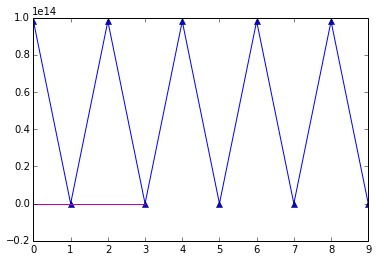

+++++++++++++++++++++++++++++++++++
Feature FILE: row-yixu-hertz-sorttone.csv
run: 0
run: 1
run: 2
run: 3
run: 4
run: 5
run: 6
run: 7
best accuracy: 0.549479166667
Objective Functions: [8053595.5836909497, 6028398.5487898244, 5849134.938823699, 5628277.3202531701, 5379205.1569907852, 5231295.8284518057, 5173084.949815874, 5166836.7105313623, 5166108.6831640294, 5165504.06855118]


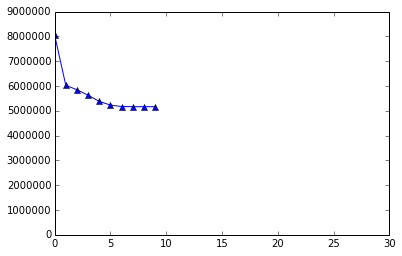

+++++++++++++++++++++++++++++++++++
Feature FILE: row-yixunorm-bk-sorttone.csv
run: 0
run: 1
run: 2
duplicated majority class, accuracy too low!!! Exiting...
run: 3
run: 4
run: 5
run: 6
run: 7
best accuracy: 0.655729166667
Objective Functions: [122.24919966233361, 111.8415486174724, 110.6120459547877, 109.67331579304248, 108.59406192426964, 107.25595149152421, 106.24503123927008, 105.42659333838284, 104.9701167225677, 104.49798809865111]


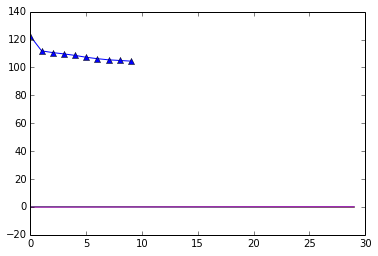

In [24]:
#analysis:kmeans with euclidean distance with 5 types of representation feature files
total_cost_log=[]
total_accuracy_log=[]
for file in onlyfiles:
    data = np.genfromtxt(file, delimiter=',')
    print "+++++++++++++++++++++++++++++++++++"
    print "Feature FILE:",file
    num_run=8
    best_accuracy=0
    for run in range(num_run):
        print "run:",run
        centroids,assignments,costLog=k_means_clust_euclid(data,4,10)
        accuracy=computeAccuracy(assignments)
        if accuracy>best_accuracy:
            best_accuracy=accuracy
            best_cost=costLog
    print "best accuracy:",best_accuracy
    print "Objective Functions:",best_cost
    plt.plot(best_cost,'^-')
    total_cost_log.append(best_cost)
    total_accuracy_log.append(best_accuracy)
    for i in centroids:
        plt.plot(i)
    plt.show()

In [133]:
print total_accuracy_log
print total_cost_log

[0.81875, 0.4942708333333333, 0, 0.5567708333333333, 0.6682291666666667]
[[1263768233.9047019, 711064921.86734509, 664926817.56823599, 642571255.16667819, 621578249.89854717, 594443494.81004667, 566812126.91115189, 545252614.31374264, 535840313.86492544, 533654402.39167309], [98082325495951.859, 3113038.5476798443, 98082325560143.406, 3085688.1204189397, 98083515434525.797, 7059254.6787268929, 98082721529134.219, 2627245.0521387961, 98082522956997.438, 3209962.5271603833], [98082325495951.859, 3113038.5476798443, 98082325560143.406, 3085688.1204189397, 98083515434525.797, 7059254.6787268929, 98082721529134.219, 2627245.0521387961, 98082522956997.438, 3209962.5271603833], [9270246.4532139003, 6068344.4170682738, 5727156.6494191866, 5482548.0370944552, 5296007.6812113021, 5214181.267612434, 5179726.6893061418, 5170063.3617965169, 5168749.6582384482, 5168526.4742312394], [203.49655337548793, 130.45234766698613, 118.90785949952628, 113.64353838619492, 111.03511986720744, 110.36375451312814

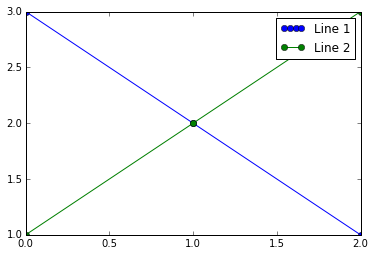

In [135]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot([3,2,1], marker='o', label='Line 1')
line2, = plt.plot([1,2,3], marker='o', label='Line 2')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

In [35]:
import math,matplotlib

In [36]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (math.sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'text.fontsize': 8, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

In [60]:

import numpy as np
import matplotlib as mpl
mpl.use('pgf')

def figsize(scale):
    fig_width_pt = 469.755                          # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "text.fontsize": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": figsize(0.9),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }
mpl.rcParams.update(pgf_with_latex)

import matplotlib.pyplot as plt

# I make my own newfig and savefig functions
def newfig(width):
    plt.clf()
    fig = plt.figure(figsize=figsize(width))
    ax = fig.add_subplot(111)
    return fig, ax

def savefig(filename):
    plt.savefig('{}.pgf'.format(filename))
    plt.savefig('{}.pdf'.format(filename))


# Simple plot
fig, ax  = newfig(0.6)

def ema(y, a):
    s = []
    s.append(y[0])
    for t in range(1, len(y)):
        s.append(a * y[t] + (1-a) * s[t-1])
    return np.array(s)
    
y = [0]*200
y.extend([20]*(1000-len(y)))
s = ema(y, 0.01)

ax.plot(s)
ax.set_xlabel('X Label')
ax.set_ylabel('EMA')

savefig('ema')

OSError: [Errno 2] No such file or directory

In [61]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.plot([1,2,3])
plt.savefig('myfig')

RuntimeError: LaTeX was not able to process the following string:
'lp'
Here is the full report generated by LaTeX: 



In [53]:
latexify()

In [62]:
len(total_cost_log)
marks=['o-','v-','x-','s-','D-']
#line1, = plt.plot([1,2,3], label="Line 1", linestyle='--')
labels=['D1','qTA','polynomial','hertz','norm-bark']
for i,cost in enumerate(total_cost_log):
    norm_cost=(cost-np.mean(cost))/np.std(cost)
    plt.plot(norm_cost,marks[i],label=labels[i])
    plt.legend()
    plt.ylabel("Intra-cluster distance")
    plt.xlabel("num of interation")
    plt.title("K-means clustering Objective Function")
    #plt.tight_layout()
#plt.savefig("image2.pdf")


In [57]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('multipage.pdf')

In [58]:
plt.savefig("image2.pdf")


In [52]:
pwd

u'/Users/zangsir/time-series-classification-and-clustering/toneData'

In [39]:
plt.show()

['allxudn-3speakers-sorttone.csv',
 'concatSynth1-sorttone.csv',
 'poly-normed-bark-30p-sorttone.csv',
 'row-yixu-hertz-sorttone.csv',
 'row-yixunorm-bk-sorttone.csv']

## k means with DTW distance with non-model-based features

In [148]:
cd /Users/zangsir/time-series-classification-and-clustering/toneSub/

/Users/zangsir/time-series-classification-and-clustering/toneSub


In [63]:

from os import listdir
from os.path import isfile, join
mypath="/Users/zangsir/time-series-classification-and-clustering/toneSub/"
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]

In [69]:
onlyfiles

['allxudn-3speakers-sorttone.csv', 'row-yixunorm-bk-sorttone.csv']

In [68]:
cd toneSub/

/Users/zangsir/time-series-classification-and-clustering/toneSub


In [64]:
#analysis:kmeans with DTW distance with norm_bk, D1
total_cost_log=[]
total_accuracy_log=[]
for file in onlyfiles:
    data = np.genfromtxt(file, delimiter=',')
    print "+++++++++++++++++++++++++++++++++++"
    print "Feature FILE:",file
    num_run=5
    best_accuracy=0
    for run in range(num_run):
        print "run:",run
        centroids,assignments,costLog=k_means_clust_DTW_LBK(data,4,10)
        accuracy=computeAccuracy(assignments)
        if accuracy>best_accuracy:
            best_accuracy=accuracy
            best_cost=costLog
    print "best accuracy:",best_accuracy
    print "Objective Functions:",best_cost
    plt.plot(best_cost,'^-')
    total_cost_log.append(best_cost)
    total_accuracy_log.append(best_accuracy)
    for i in centroids:
        plt.plot(i)
    plt.show()

+++++++++++++++++++++++++++++++++++
Feature FILE: allxudn-3speakers-sorttone.csv
run: 0
run: 1
run: 2
run:

KeyboardInterrupt: 

 3


In [293]:
total_cost_log=[[1316293719.0264616, 1007565676.7676985, 887640766.74403095, 716695143.04350376, 566286004.62404275, 552564591.33537316, 548667058.15881848, 545468012.69317341, 543479386.71627426, 541089706.96672249]
,[234.57057311811025, 115.86564730833736, 112.85964819159125, 111.66019269379521, 110.66230081992083, 108.95686658353559, 107.55975432245904, 106.17043142406895, 105.61918430902682, 105.21213741001264]]

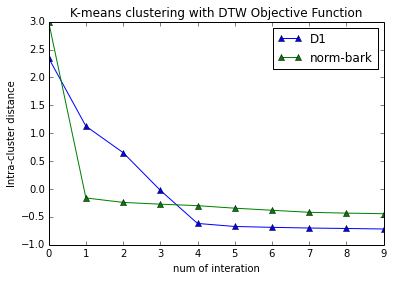

In [294]:
len(total_cost_log)
#line1, = plt.plot([1,2,3], label="Line 1", linestyle='--')
labels=['D1','norm-bark']
for i,cost in enumerate(total_cost_log):
    norm_cost=(cost-np.mean(cost))/np.std(cost)
    plt.plot(norm_cost,'^-',label=labels[i])
    plt.legend()
    plt.ylabel("Intra-cluster distance")
    plt.xlabel("num of interation")
    plt.title("K-means clustering with DTW Objective Function")

## k means with Mindist with non-model-based features

In [279]:
cd /Users/zangsir/time-series-classification-and-clustering/toneSub/

/Users/zangsir/time-series-classification-and-clustering/toneSub


In [70]:
from os import listdir
from os.path import isfile, join
mypath="/Users/zangsir/time-series-classification-and-clustering/toneSub/"
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]

In [71]:
onlyfiles

['allxudn-3speakers-sorttone.csv', 'row-yixunorm-bk-sorttone.csv']

------------------ 12 6
num of iteration: 4


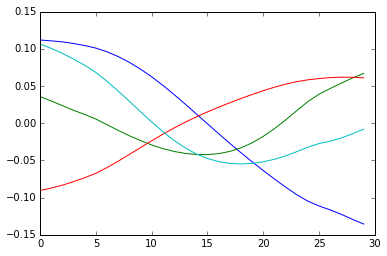

------------------ 12 7


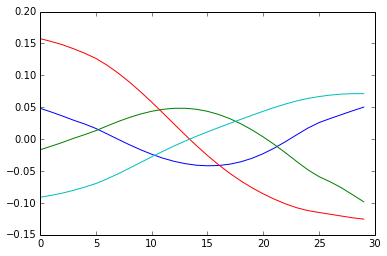

------------------ 12 8
num of iteration: 4


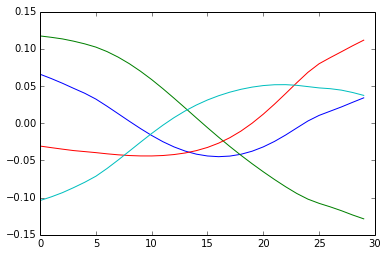

------------------ 12 9
num of iteration: 5


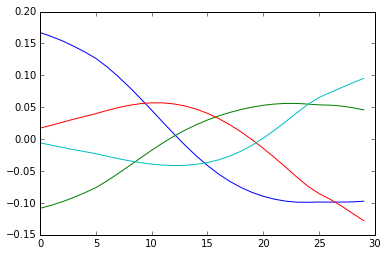

------------------ 12 10
num of iteration: 4


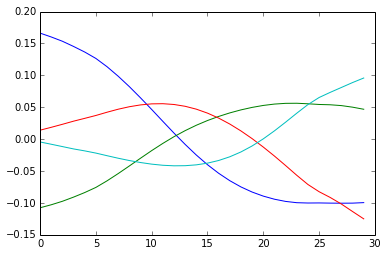

KeyboardInterrupt: 

------------------ 12 11


In [282]:
data = np.genfromtxt(onlyfiles[1], delimiter=',')
#experiment with pars of SAX. good:(5,7),(14,11),(14,6),(12,10)|(14,10),(13,6),(12,11)
for p in range(12,14):
    for q in range(6,12):
        print "------------------",p,q
        centroids,assignments,cost=k_means_clust_mindist(data,4,10,p,q)
        for i in centroids:
            plt.plot(i)
        plt.show()

In [72]:
#analysis:kmeans with euclidean distance with norm_bk, D1
total_cost_log=[]
total_accuracy_log=[]
for file in onlyfiles:
    data = np.genfromtxt(file, delimiter=',')
    print "+++++++++++++++++++++++++++++++++++"
    print "Feature FILE:",file
    num_run=5
    best_accuracy=0
    for run in range(num_run):
        print "run:",run
        for p in range(12,14):
            for q in range(6,12):
                print "------------------",p,q
                centroids,assignments,costLog=k_means_clust_mindist(data,4,10,p,q)
                plt.plot(costLog,'^-')
                accuracy=computeAccuracy(assignments)
                #print "accuracy:",accuracy
                if accuracy>best_accuracy:
                    best_accuracy=accuracy
                    best_cost=costLog
    print "best accuracy:",best_accuracy
    print "Objective Functions:",best_cost
    plt.plot(best_cost,'^-')
    total_cost_log.append(best_cost)
    total_accuracy_log.append(best_accuracy)
    for i in centroids:
        plt.plot(i)
    plt.show()

NameError: global name 'SAX' is not defined

+++++++++++++++++++++++++++++++++++
Feature FILE: allxudn-3speakers-sorttone.csv
run: 0
------------------ 12 6


In [286]:
total_cost_log

[[1392866822.4053445,
  884669886.26847267,
  834505186.13830245,
  818365757.78070807,
  779383580.21253061,
  774817374.25547028,
  773551044.38475418,
  773543736.09121895],
 [262.95428078069978,
  181.1852136442341,
  178.89138687417324,
  173.22608748122695,
  165.90931591443268,
  161.30605439660525,
  159.18437101468083,
  159.13434221854624]]

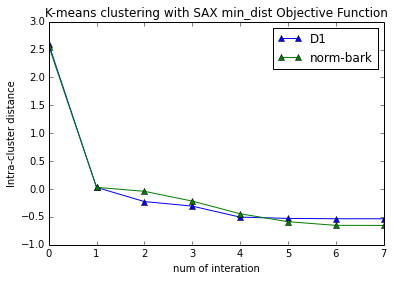

In [289]:
len(total_cost_log)
#line1, = plt.plot([1,2,3], label="Line 1", linestyle='--')
labels=['D1','norm-bark']
for i,cost in enumerate(total_cost_log):
    norm_cost=(cost-np.mean(cost))/np.std(cost)
    plt.plot(norm_cost,'^-',label=labels[i])
    plt.legend()
    plt.ylabel("Intra-cluster distance")
    plt.xlabel("num of interation")
    plt.title("K-means clustering with SAX min_dist Objective Function")